In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/Users/avkar/PycharmProjects/FinalYearProject/venv/Code/cleaned_eda_dataset_w_upcoming.csv')

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Use only Male Fighters

In [5]:
df_cleaned = df[df["Gender"] == "MALE"]

In [6]:
df_cleaned.describe()

,RedOdds,BlueOdds,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,FinishRound,TotalFightTimeSecs
count,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.0,4371.0,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.0,4371.0,4371.0,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4360.000000,4360.000000
mean,-115.717227,61.884695,3.209792,0.568520,1.151910,0.024022,20.979316,0.456934,0.501962,1.342898,0.320143,2.304736,2.205216,14.155113,0.290551,0.021505,0.330817,1.272249,1.368108,0.756577,0.029970,3.800503,179.604324,184.444660,168.776939,0.646076,1.243651,0.033860,21.342090,0.463095,0.543001,1.434433,0.338106,3.079387,2.876230,19.931823,0.637840,0.031572,0.443606,1.845573,1.909174,1.093342,0.045070,5.387783,179.513672,184.636662,169.081675,30.722489,30.143674,0.016701,-0.091512,-0.774651,-1.587280,-0.011668,-5.776710,-0.347289,-0.556166,-0.336765,0.090652,-0.192002,0.112560,-0.362774,-0.041038,-0.091534,0.824296,1.204072,-1.0,-1.0,-0.996797,-0.998856,-0.712194,-0.698467,-0.704644,-0.687943,-0.706246,-0.703500,-0.711508,-0.754747,-0.730954,-1.0,-1.0,-1.0,-0.997483,-0.700755,-0.770991,-0.735072,-0.762983,-0.771448,-0.767101,-0.765729,-0.755434,-0.906886,2.412156,650.868578
std,270.407938,247.264005,0.612722,0.826094,1.501878,0.157554,19.753707,0.104839,0.660395,1.365325,0.230550,1.959317,2.241634,14.256243,1.148175,0.146647,0.645994,1.673869,1.862352,1.369076,0.178395,3.848743,8.025319,9.863612,33.133181,0.892824,1.887058,0.191936,19.089404,0.093700,0.664181,1.312918,0.207683,2.267038,2.810411,17.672832,1.674393,0.176181,0.740902,2.076719,2.261049,1.738375,0.223413,4.618233,8.239360,9.866711,33.274271,4.144981,3.927424,1.018567,2.039170,2.114299,4.462389,3.291081,18.3908

# Encode Categorical Columns

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Columns to One-Hot Encode
one_hot_cols = ["BetterRank", "Gender", "Country", 
                "BlueStance", "RedStance", "Finish", "FinishDetails", "WeightClass"]

# Initialise OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# Fit and transform the selected columns
encoded_array = encoder.fit_transform(df_cleaned[one_hot_cols])

# Create a DataFrame from the encoded array with proper column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(one_hot_cols))

# Reset index on encoded_df to align it with df_cleaned
encoded_df.reset_index(drop=True, inplace=True)

# Label Encoding for 'Title Bout'
df_cleaned["TitleBout"] = df_cleaned["TitleBout"].map({True: 1, False: 0})

# Label Encoding for Fighter Names
all_fighters = pd.concat([df_cleaned["RedFighter"], df_cleaned["BlueFighter"]]).unique()

# Create a single consistent ID mapping
fighter_encoder = LabelEncoder()
fighter_encoder.fit(all_fighters)  # Fit on all fighters (both red & blue)

# Apply the same encoding to both columns
df_cleaned["RedFighter_ID"] = df_cleaned["RedFighter"].map(lambda x: fighter_encoder.transform([x])[0])
df_cleaned["BlueFighter_ID"] = df_cleaned["BlueFighter"].map(lambda x: fighter_encoder.transform([x])[0])

# Map Winner column
df_cleaned['Winner'] = df_cleaned['Winner'].map({'Red': 0, 'Blue': 1})

# Reset index to align with encoded_df
df_cleaned.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded columns back to df_cleaned
df_cleaned = pd.concat([df_cleaned, encoded_df], axis=1)


/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_2496/766695936.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["TitleBout"] = df_cleaned["TitleBout"].map({True: 1, False: 0})
/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_2496/766695936.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["RedFighter_ID"] = df_cleaned["RedFighter"].map(lambda x: fighter_encoder.transform([x])[0])
/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_2496/766695936.py:31

In [8]:
df_cleaned.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,Date,Location,Country,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,BetterRank,Finish,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,source,RedFighter_ID,BlueFighter_ID,BetterRank_Red,BetterRank_neither,Country_ Australia,Country_ Brazil,Country_ Canada,Country_ Chile,Country_ China,Country_ Croatia,Country_ Czech Republic,Country_ Denmark,Country_ Germany,Country_ Ireland,Country_ Japan,Country_ Mexico,Country_ Netherlands,Country_ New Zealand,Country_ Philippines,Country_ Poland,Country_ Russia,Country_ Singapore,Country_ South Korea,Country_ Sweden,Country_ USA,Country_ United Arab Emirates,Country_ United Kingdom,Country_ Uruguay,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,Country_Mexico,Country_Saudi Arabia,Country_Singapore,Country_USA,Country_United Arab Emirates,Country_United Kingdom,BlueStance_Orthodox,BlueStance_Southpaw,BlueStance_Switch,RedStance_Orthodox,RedStance_Southpaw,RedStance_Switch,Finish_KO/TKO,Finish_M-DEC,Finish_Overturned,Finish_S-DEC,Finish_SUB,Finish_U-DEC,Finish_nan,FinishDetails_Ankle Lock,FinishDetails_Arm Triangle,FinishDetails_Armbar,FinishDetails_D'Arce Choke,FinishDetails_Elbow,FinishDetails_Elbows,FinishDetails_Ezekiel Choke,FinishDetails_Flying Knee,FinishDetails_Guillotine Choke,FinishDetails_Heel Hook,FinishDetails_Injury,FinishDetails_Inverted Triangle,FinishDetails_Keylock,FinishDetails_Kick,FinishDetails_Kicks,FinishDetails_Kimura,FinishDetails_Knee,FinishDetails_Kneebar,FinishDetails_Knees,FinishDetails_Neck Crank,FinishDetails_No Finish,FinishDetails_North-South Choke,FinishDetails_Omoplata,FinishDetails_Other - Choke,FinishDetails_Other - Lock,FinishDetails_Peruvian Necktie,FinishDetails_Punch,FinishDetails_Punches,FinishDetails_Rear Naked Choke,FinishDetails_Scarf Hold,FinishDetails_Slam,FinishDetails_Spinning Back Elbow,FinishDetails_Spinning Back Fist,FinishDetails_Spinning Back Kick,FinishDetails_Straight Armbar,FinishDetails_Triangle Armbar,FinishDetails_Triangle Choke,FinishDetails_Twister,WeightClass_Catch Weight,WeightClass_Featherweight,WeightClass_Flyweight,WeightClass_Heavyweight,WeightClass_Light Heavyweight,WeightClass_Lightweight,WeightClass_Middleweight,WeightClass_Welterweight
0,Colby Covington,Joaquin Buckley,205.0,-250.0,2024-12-14,"Tampa, Florida, USA",USA,NaN,0,Welterweight,MALE,5,0,5,0,4.13,0.36,0.0,1.96,0.46,5,4,34,0,0,1,2,7,0,0,10,Southpaw,177.80,193.04,170,1,0,0,3.88,0.38,0.2,3.79,0.44,7,4,58,4,0,0,7,3,2,0,12,Orthodox,180.34,182.88,170,36,30,-

In [9]:
df_cleaned = df_cleaned.drop(columns=['Location'])

# Feature Engineering

In [10]:
# Convert Date to datetime format
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

# Create a single 'Fighter' column to track fight history
fighters_red = df_cleaned[['RedFighter', 'Date']].rename(columns={'RedFighter': 'Fighter'})
fighters_blue = df_cleaned[['BlueFighter', 'Date']].rename(columns={'BlueFighter': 'Fighter'})

# Combine both red & blue fighters to track history per fighter
all_fighters = pd.concat([fighters_red, fighters_blue]).drop_duplicates().sort_values(by=["Fighter", "Date"])

# Compute Time Since Last Fight
all_fighters["Previous_Fight_Date"] = all_fighters.groupby("Fighter")["Date"].shift(1)
all_fighters["Time_Since_Last_Fight"] = (all_fighters["Date"] - all_fighters["Previous_Fight_Date"]).dt.days

# Identify Debut Fighters (fighters with no previous fight)
all_fighters["Debut_Fighter"] = all_fighters["Previous_Fight_Date"].isna().astype(int)

# Handle missing values in Time_Since_Last_Fight
median_gap = all_fighters["Time_Since_Last_Fight"].median()  # Median time between fights
all_fighters["Time_Since_Last_Fight"].fillna(median_gap, inplace=True)

# Merge Features Back to Main Dataset for Red & Blue Fighters
df_cleaned = df_cleaned.merge(
    all_fighters[['Fighter', 'Date', 'Time_Since_Last_Fight', 'Debut_Fighter']],
    how="left",
    left_on=["RedFighter", "Date"],
    right_on=["Fighter", "Date"]
).rename(columns={"Time_Since_Last_Fight": "Time_Since_Last_Fight_Red", "Debut_Fighter": "Debut_Fighter_Red"})

df_cleaned = df_cleaned.merge(
    all_fighters[['Fighter', 'Date', 'Time_Since_Last_Fight', 'Debut_Fighter']],
    how="left",
    left_on=["BlueFighter", "Date"],
    right_on=["Fighter", "Date"]
).rename(columns={"Time_Since_Last_Fight": "Time_Since_Last_Fight_Blue", "Debut_Fighter": "Debut_Fighter_Blue"})

# Drop extra 'Fighter' columns created during merging
df_cleaned.drop(columns=["Fighter_x", "Fighter_y"], inplace=True)

# Fill any remaining NaN values
df_cleaned.fillna(0, inplace=True)


/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_2496/2278394264.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_fighters["Time_Since_Last_Fight"].fillna(median_gap, inplace=True)


In [11]:
df_cleaned[["RedFighter", "BlueFighter", "Date", "Time_Since_Last_Fight_Red", "Debut_Fighter_Red", "Time_Since_Last_Fight_Blue", "Debut_Fighter_Blue"]].head(10)

,RedFighter,BlueFighter,Date,Time_Since_Last_Fight_Red,Debut_Fighter_Red,Time_Since_Last_Fight_Blue,Debut_Fighter_Blue
0,Colby Covington,Joaquin Buckley,2024-12-14,364.0,0,70.0,0
1,Cub Swanson,Billy Quarantillo,2024-12-14,168.0,0,266.0,0
2,Manel Kape,Bruno Silva,2024-12-14,140.0,0,49.0,0
3,Vitor Petrino,Dustin Jacoby,2024-12-14,224.0,0,189.0,0
4,Adrian Yanez,Daniel Marcos,2024-12-14,210.0,0,189.0,0
5,Navajo Stirling,Tuco Tokkos,2024-12-14,182.0,1,210.0,0
6,Michael Johnson,Ottman Azaitar,2024-12-14,308.0,0,518.0,0
7,Joel Alvarez,Drakkar Klose,2024-12-14,133.0,0,224.0,0
8,Sean Woodson,Fernando Padilla,2024-12-14,217.0,0,266.0,0
9,Miles Johns,Felipe Lima,2024-12-14,182.0,0,175.0,0


# Bayesian Bradley-Terry Model for fighter skill rating

In [12]:
from scipy.optimize import minimize

In [13]:
fighters = pd.unique(df_cleaned[["RedFighter_ID", "BlueFighter_ID"]].values.ravel())
fighter_to_idx = {fid: i for i, fid in enumerate(fighters)}
idx_to_fighter = {i: fid for fid, i in fighter_to_idx.items()}
num_fighters = len(fighters)

In [14]:
def neg_log_posterior(theta, df, fighter_to_idx, sigma=1.0):
    # Vectorized fighter indices
    red_idx = df["RedFighter_ID"].map(fighter_to_idx).values
    blue_idx = df["BlueFighter_ID"].map(fighter_to_idx).values

    # Skill values
    theta_red = theta[red_idx]
    theta_blue = theta[blue_idx]

    # Win probabilities
    prob_blue_wins = 1 / (1 + np.exp(theta_red - theta_blue))

    # Outcome
    winner = df["Winner"].values  # 1 if Blue wins, 0 if Red wins

    # Weighted log-likelihood
    ll = np.sum(
        (
            winner * np.log(prob_blue_wins + 1e-9) +
            (1 - winner) * np.log(1 - prob_blue_wins + 1e-9)
        )
    )

    # Gaussian prior
    prior = -np.sum(theta**2) / (2 * sigma**2)

    return -(ll + prior)


In [16]:
# Extract skill ratings
theta_init = np.zeros(num_fighters)

# Minimize using L-BFGS-B
result = minimize(
    neg_log_posterior,
    theta_init,
    args=(df_cleaned, fighter_to_idx),
    method="L-BFGS-B",
    options={"disp": True}
)
theta_hat = result.x
ratings = pd.DataFrame({
    "Fighter_ID": [idx_to_fighter[i] for i in range(num_fighters)],
    "Skill": theta_hat
}).sort_values(by="Skill", ascending=False)

# top 10 fighters
ratings.head(10)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1655     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02975D+03    |proj g|=  9.00000D+00


 This problem is unconstrained.



At iterate    1    f=  2.80981D+03    |proj g|=  4.79745D+00

At iterate    2    f=  2.50264D+03    |proj g|=  5.93895D+00

At iterate    3    f=  2.48651D+03    |proj g|=  3.48768D+00

At iterate    4    f=  2.48288D+03    |proj g|=  6.97310D-01

At iterate    5    f=  2.48104D+03    |proj g|=  4.79668D-01

At iterate    6    f=  2.48079D+03    |proj g|=  9.89758D-01

At iterate    7    f=  2.48064D+03    |proj g|=  1.31286D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 1655      7     10      1     0     0   1.313D-01   2.481D+03
  F =   2480.6448846626172     

STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIM

,Fighter_ID,Skill
70,803,2.525389
226,1100,2.075191
316,960,2.067134
401,654,2.055775
883,918,2.038290
126,645,1.940802
270,471,1.922912
317,142,1.859174
187,48,1.856901
24,1446,1.826872


In [17]:
# Build ID → Name mapping from original df
id_name_map = pd.concat([
    df_cleaned[["RedFighter_ID", "RedFighter"]].rename(
        columns={"RedFighter_ID": "Fighter_ID", "RedFighter": "Fighter_Name"}
    ),
    df_cleaned[["BlueFighter_ID", "BlueFighter"]].rename(
        columns={"BlueFighter_ID": "Fighter_ID", "BlueFighter": "Fighter_Name"}
    )
]).drop_duplicates("Fighter_ID")

In [18]:
# Merge with ratings, print top 10 fighters
ratings_named = ratings.merge(id_name_map, on="Fighter_ID", how="left")
ratings_named[["Fighter_ID","Fighter_Name", "Skill"]].head(10)


,Fighter_ID,Fighter_Name,Skill
0,803,Jon Jones,2.525389
1,1100,Merab Dvalishvili,2.075191
2,960,Leon Edwards,2.067134
3,654,Islam Makhachev,2.055775
4,918,Khabib Nurmagomedov,2.038290
5,645,Ilia Topuria,1.940802
6,471,Dricus Du Plessis,1.922912
7,142,Belal Muhammad,1.859174
8,48,Alex Pereira,1.856901
9,1446,Shavkat Rakhmonov,1.826872


# BBTM w/ Lambda weighting

In [ ]:
now = pd.Timestamp.now()
df_cleaned["MonthsAgo"] = (now - df_cleaned["Date"]).dt.days / 30

In [ ]:
def neg_log_posterior_weighted(theta, df, fighter_to_idx, sigma=1.0):
    # Vectorized fighter indices
    red_idx = df["RedFighter_ID"].map(fighter_to_idx).values
    blue_idx = df["BlueFighter_ID"].map(fighter_to_idx).values

    # Skill values
    theta_red = theta[red_idx]
    theta_blue = theta[blue_idx]

    # Win probabilities
    prob_blue_wins = 1 / (1 + np.exp(theta_red - theta_blue))

    # Outcomes and weights
    winner = df["Winner"].values  # 1 if Blue wins, 0 if Red wins
    weight = df["Weight"].values

    # Weighted log-likelihood
    ll = np.sum(
        weight * (
            winner * np.log(prob_blue_wins + 1e-9) +
            (1 - winner) * np.log(1 - prob_blue_wins + 1e-9)
        )
    )

    # Gaussian prior
    prior = -np.sum(theta**2) / (2 * sigma**2)

    return -(ll + prior)


In [ ]:
lambda_values = [0.0, 0.01, 0.05, 0.1, 0.2]
skill_results = {}

# Estimates skills into a dictionary 
for lv in lambda_values:
    df_cleaned["Weight"] = np.exp(-lv * df_cleaned["MonthsAgo"])
    theta_init = np.zeros(num_fighters)
    result = minimize(
        neg_log_posterior_weighted,
        theta_init,
        args=(df_cleaned, fighter_to_idx),
        method="L-BFGS-B",
        options={"disp": True}
    )
    skill_results[lv] = result.x


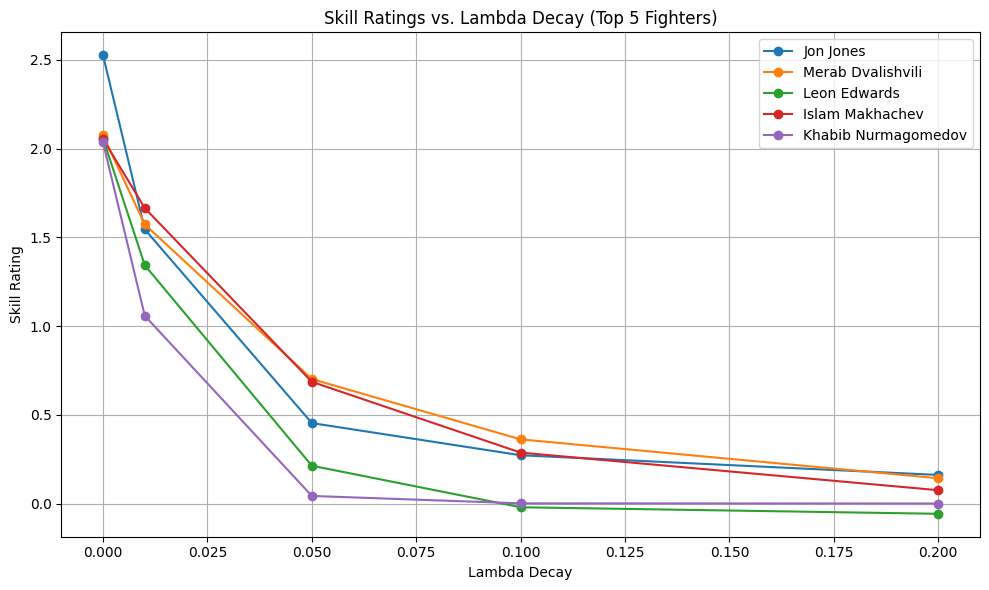

In [43]:
import matplotlib.pyplot as plt


# Pick top fighters based on no decay (legacy skill)
top_fighter_indices = np.argsort(skill_results[0])[::-1][:5] 

# Plots Top 5 Fighters' Skill Over Lambda 
plt.figure(figsize=(10, 6))
for i in top_fighter_indices:
    skills = [skill_results[lam][i] for lam in lambda_values]
    fighter_id = idx_to_fighter[i]
    fighter_name = ratings_named.loc[ratings_named["Fighter_ID"] == fighter_id,
    "Fighter_Name"].values[0]
    plt.plot(lambda_values, skills, marker='o', label=fighter_name)


plt.title("Skill Ratings vs. Lambda Decay (Top 5 Fighters)")
plt.xlabel("Lambda Decay")
plt.ylabel("Skill Rating")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Alpha value experimentation for skill gap tranlsation to win probabilities

In [20]:
def neg_log_posterior_with_alpha(theta, df, fighter_to_idx, sigma=1.0, alpha=1.0):
    red_idx = df["RedFighter_ID"].map(fighter_to_idx).values
    blue_idx = df["BlueFighter_ID"].map(fighter_to_idx).values
    theta_red = theta[red_idx]
    theta_blue = theta[blue_idx]
    
    prob_blue_wins = 1 / (1 + np.exp(-alpha * (theta_blue - theta_red)))
    winner = df["Winner"].values
    weight = df["Weight"].values
    
    ll = np.sum(
        weight * (
            winner * np.log(prob_blue_wins + 1e-9) +
            (1 - winner) * np.log(1 - prob_blue_wins + 1e-9)
        )
    )
    prior = -np.sum(theta**2) / (2 * sigma**2)
    return -(ll + prior)


In [156]:
alpha_values = [0.5, 1.0, 1.5, 2.0]
skill_results_alpha = {}

for alpha in alpha_values:
    result = minimize(
        neg_log_posterior_with_alpha,
        theta_init,
        args=(df_cleaned, fighter_to_idx, 1.0, alpha),
        method="L-BFGS-B",
        options={"disp": True}
    )
    skill_results_alpha[alpha] = result.x


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1515     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.89707D+01    |proj g|=  1.85714D-01


 This problem is unconstrained.



At iterate    1    f=  4.80574D+01    |proj g|=  4.85592D-02

At iterate    2    f=  4.79844D+01    |proj g|=  1.81899D-04

At iterate    3    f=  4.79844D+01    |proj g|=  7.81597D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 1515      3      4      1     0     0   7.816D-06   4.798D+01
  F =   47.984391229294431     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1515     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.89707D+01    |proj g|=  3.71427D-01

At iterate    1    f=  4.66903D+01    |proj g|=  2.10753D-01

At iterate    2    f=  4.54732D+01    |proj g|=  4.99512D-03

At iterate    3    f=  4.54731D+01    |proj g|=  6.34515D-04

At iterate    4    f=  4.54731D+01    |proj g|=  2.70006D-05

At iterate    5    f=  4.54731D+01    |proj g|=  3.55271D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 1515      5      6      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1515     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.89707D+01    |proj g|=  5.57140D-01

At iterate    1    f=  4.53692D+01    |proj g|=  3.57451D-01

At iterate    2    f=  4.23020D+01    |proj g|=  2.61799D-02

At iterate    3    f=  4.22995D+01    |proj g|=  5.52589D-03

At iterate    4    f=  4.22994D+01    |proj g|=  5.52802D-04

At iterate    5    f=  4.22994D+01    |proj g|=  1.13687D-04

At iterate    6    f=  4.22994D+01    |proj g|=  1.20792D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1515     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.89707D+01    |proj g|=  7.42853D-01

At iterate    1    f=  4.40938D+01    |proj g|=  4.88929D-01

At iterate    2    f=  3.91102D+01    |proj g|=  6.64116D-02

At iterate    3    f=  3.90927D+01    |proj g|=  1.99897D-02

At iterate    4    f=  3.90917D+01    |proj g|=  4.40323D-03

At iterate    5    f=  3.90917D+01    |proj g|=  1.01963D-03

At iterate    6    f=  3.90917D+01    |proj g|=  1.20082D-04

At iterate    7    f=  3.90917D+01    |proj g|=  2.34479D-05

At iterate    8    f=  3.90917D+01    |proj g|=  5.68434D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [157]:
alpha_to_ranking = {}

for alpha, theta in skill_results_alpha.items():
    ranking_df = pd.DataFrame({
        "Fighter_ID": [idx_to_fighter[i] for i in range(len(theta))],
        "Skill": theta
    }).merge(ratings_named[["Fighter_ID", "Fighter_Name"]], on="Fighter_ID", how="left")  # Add Fighter_Name

    ranking_df = ranking_df.sort_values(by="Skill", ascending=False)
    alpha_to_ranking[alpha] = ranking_df["Fighter_Name"].tolist()


In [158]:
top_fighters = alpha_to_ranking[1.0][:5]  # Top 5 at baseline alpha (1.0)
ranking_over_alpha = {name: [] for name in top_fighters}

for alpha in sorted(alpha_to_ranking.keys()):
    curr_ranking = alpha_to_ranking[alpha]
    for name in top_fighters:
        try:
            rank = curr_ranking.index(name) + 1
        except ValueError:
            rank = None
        ranking_over_alpha[name].append(rank)


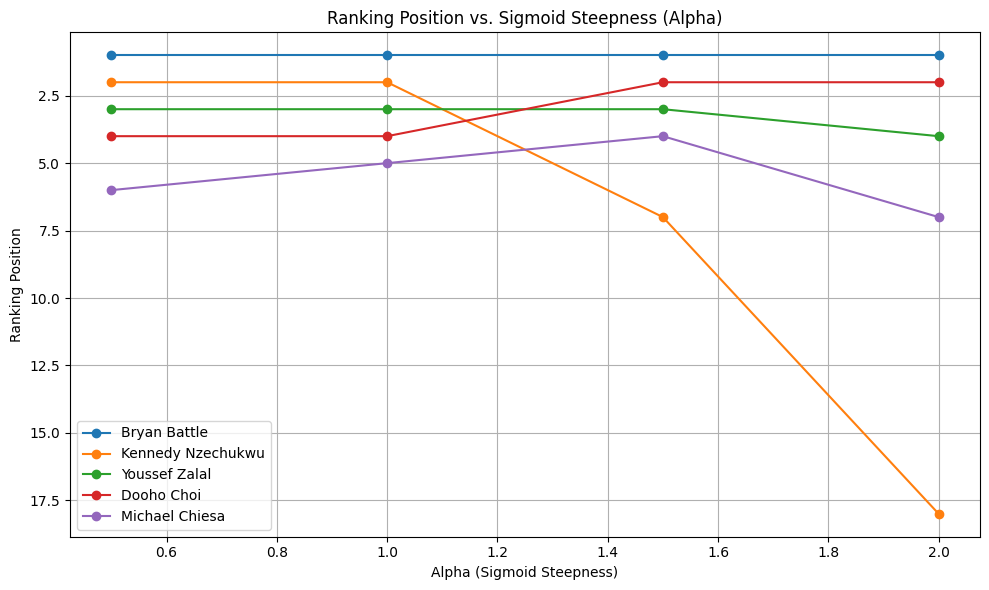

In [159]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, ranks in ranking_over_alpha.items():
    plt.plot(sorted(alpha_to_ranking.keys()), ranks, marker='o', label=name)

plt.gca().invert_yaxis()  # So Rank 1 is at the top
plt.title("Ranking Position vs. Sigmoid Steepness (Alpha)")
plt.xlabel("Alpha (Sigmoid Steepness)")
plt.ylabel("Ranking Position")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Final BBTM model

In [79]:
lambda_decay = 0.0075
alpha = 1

In [80]:
latest_date = df_cleaned["Date"].max()
df_cleaned["RecencyWeight"] = np.exp(-lambda_decay * ((latest_date - df_cleaned["Date"]).dt.days / 30.0))  # time in months

In [81]:
def neg_log_posterior(theta):
    i_idx = df_cleaned["RedFighter_ID"].map(fighter_to_idx).values
    j_idx = df_cleaned["BlueFighter_ID"].map(fighter_to_idx).values
    theta_i = theta[i_idx]
    theta_j = theta[j_idx]
    winner = df_cleaned["Winner"].values
    w = df_cleaned["RecencyWeight"].values

    # Bradley-Terry probabilities with alpha
    prob = 1 / (1 + np.exp(-alpha * (theta_j - theta_i)))
    log_likelihood = np.sum(w * (winner * np.log(prob + 1e-9) + (1 - winner) * np.log(1 - prob + 1e-9)))
    prior = -np.sum(theta**2) / (2.0 * 1.0**2)
    return -(log_likelihood + prior)

In [82]:
# Train model
theta_init = np.zeros(len(fighter_to_idx))
result = minimize(neg_log_posterior, theta_init, method="L-BFGS-B", options={"disp": True})
theta_final = result.x

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1655     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77904D+03    |proj g|=  4.12385D+00


 This problem is unconstrained.



At iterate    1    f=  1.64282D+03    |proj g|=  2.45388D+00

At iterate    2    f=  1.51374D+03    |proj g|=  2.73913D+00

At iterate    3    f=  1.51331D+03    |proj g|=  4.50557D+00

At iterate    4    f=  1.50952D+03    |proj g|=  4.01974D-01

At iterate    5    f=  1.50935D+03    |proj g|=  5.06816D-02

At iterate    6    f=  1.50926D+03    |proj g|=  6.53245D-02

At iterate    7    f=  1.50925D+03    |proj g|=  6.23459D-02

At iterate    8    f=  1.50925D+03    |proj g|=  5.13865D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 1655      8     10      1     0     0   5.139D-02   1.509D+03
  F =   1509.25080995

In [83]:
ratings = pd.DataFrame({
    "Fighter_ID": list(fighter_to_idx.keys()),
    "SkillRating": theta_final
})

ratings = ratings.merge(id_name_map, on="Fighter_ID", how="left")
ratings_sorted = ratings.sort_values(by="SkillRating", ascending=False).reset_index(drop=True)

In [43]:
# Display Top 10
ratings_sorted.head(20)

,Fighter_ID,SkillRating,Fighter_Name
0,654,1.790080,Islam Makhachev
1,803,1.769130,Jon Jones
2,1100,1.709972,Merab Dvalishvili
3,645,1.634263,Ilia Topuria
4,471,1.625834,Dricus Du Plessis
5,48,1.611206,Alex Pereira
6,142,1.597843,Belal Muhammad
7,1164,1.571794,Movsar Evloev
8,960,1.542360,Leon Edwards
9,1446,1.528069,Shavkat Rakhmonov


# Add back as feature in dataset

In [84]:
# 1. Create Skill Ratings Mapping
skill_rating_map = {fighter_id: theta_final[idx] for fighter_id, idx in fighter_to_idx.items()}

# 2. Add Skill Ratings to Dataset
df_cleaned["RedFighter_Skill"] = df_cleaned["RedFighter_ID"].map(skill_rating_map)
df_cleaned["BlueFighter_Skill"] = df_cleaned["BlueFighter_ID"].map(skill_rating_map)

# 3. Optional: Add Skill Difference
df_cleaned["Skill_Diff"] = df_cleaned["RedFighter_Skill"] - df_cleaned["BlueFighter_Skill"]


In [85]:
df_cleaned = df_cleaned.drop(columns=one_hot_cols)

In [86]:
# Latest UFC card (used for real world deployment)
df_cleaned.head(11)

,RedFighter,BlueFighter,RedOdds,BlueOdds,Date,Winner,TitleBout,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,FinishRound,FinishRoundTime,TotalFightTimeSecs,source,RedFighter_ID,BlueFighter_ID,BetterRank_Red,BetterRank_neither,Country_ Australia,Country_ Brazil,Country_ Canada,Country_ Chile,Country_ China,Country_ Croatia,Country_ Czech Republic,Country_ Denmark,Country_ Germany,Country_ Ireland,Country_ Japan,Country_ Mexico,Country_ Netherlands,Country_ New Zealand,Country_ Philippines,Country_ Poland,Country_ Russia,Country_ Singapore,Country_ South Korea,Country_ Sweden,Country_ USA,Country_ United Arab Emirates,Country_ United Kingdom,Country_ Uruguay,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,Country_Mexico,Country_Saudi Arabia,Country_Singapore,Country_USA,Country_United Arab Emirates,Country_United Kingdom,BlueStance_Orthodox,BlueStance_Southpaw,BlueStance_Switch,RedStance_Orthodox,RedStance_Southpaw,RedStance_Switch,Finish_KO/TKO,Finish_M-DEC,Finish_Overturned,Finish_S-DEC,Finish_SUB,Finish_U-DEC,Finish_nan,FinishDetails_Ankle Lock,FinishDetails_Arm Triangle,FinishDetails_Armbar,FinishDetails_D'Arce Choke,FinishDetails_Elbow,FinishDetails_Elbows,FinishDetails_Ezekiel Choke,FinishDetails_Flying Knee,FinishDetails_Guillotine Choke,FinishDetails_Heel Hook,FinishDetails_Injury,FinishDetails_Inverted Triangle,FinishDetails_Keylock,FinishDetails_Kick,FinishDetails_Kicks,FinishDetails_Kimura,FinishDetails_Knee,FinishDetails_Kneebar,FinishDetails_Knees,FinishDetails_Neck Crank,FinishDetails_No Finish,FinishDetails_North-South Choke,FinishDetails_Omoplata,FinishDetails_Other - Choke,FinishDetails_Other - Lock,FinishDetails_Peruvian Necktie,FinishDetails_Punch,FinishDetails_Punches,FinishDetails_Rear Naked Choke,FinishDetails_Scarf Hold,FinishDetails_Slam,FinishDetails_Spinning Back Elbow,FinishDetails_Spinning Back Fist,FinishDetails_Spinning Back Kick,FinishDetails_Straight Armbar,FinishDetails_Triangle Armbar,FinishDetails_Triangle Choke,FinishDetails_Twister,WeightClass_Catch Weight,WeightClass_Featherweight,WeightClass_Flyweight,WeightClass_Heavyweight,WeightClass_Light Heavyweight,WeightClass_Lightweight,WeightClass_Middleweight,WeightClass_Welterweight,Time_Since_Last_Fight_Red,Debut_Fighter_Red,Time_Since_Last_Fight_Blue,Debut_Fighter_Blue,MonthsAgo,Weight,RecencyWeight,RedFighter_Skill,BlueFighter_Skill,Skill_Diff
0,Colby Covington,Joaquin Buckley,205.0,-250.0,2024-12-14,0.0,0,5,0,5,0,4.13,0.36,0.0,1.96,0.46,5,4,34,0,0,1,2,7,0,0,10,177.80,193.04,170,1,0,0,3.88,0.38,0.2,3.79,0.44,7,4,58,4,0,0,7,3,2,0,12,180.34,18

# Feature Selection through Feature Importance

## Random Forest

/var/folders/g7/d5vdjz6s1vl8ksk5tqs00s_c0000gn/T/ipykernel_65148/27641823.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top_features_df, palette="viridis")


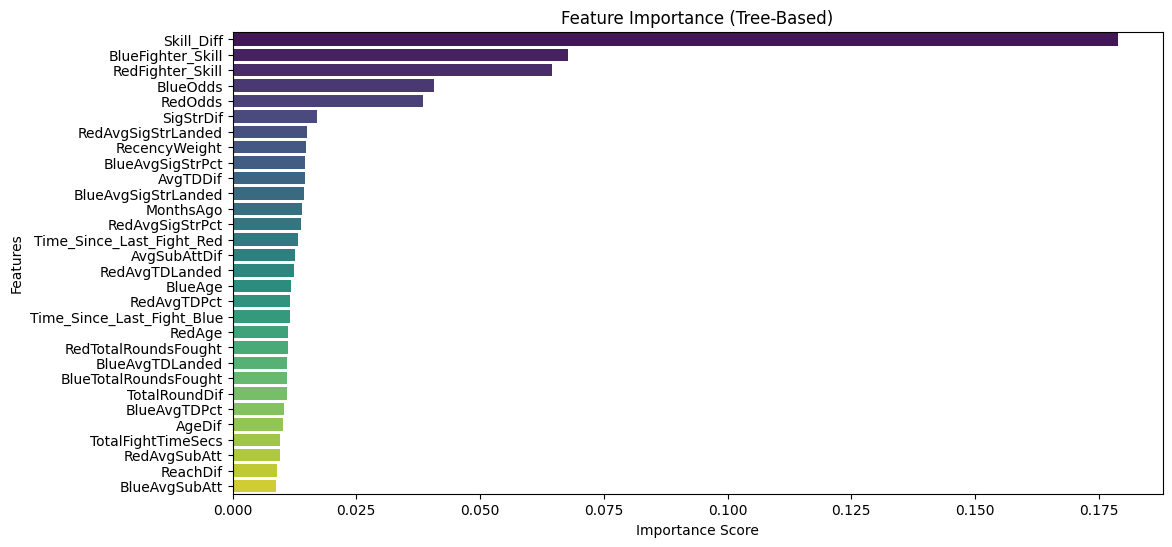

Top Selected Features: ['Skill_Diff', 'BlueFighter_Skill', 'RedFighter_Skill', 'BlueOdds', 'RedOdds', 'SigStrDif', 'RedAvgSigStrLanded', 'RecencyWeight', 'BlueAvgSigStrPct', 'AvgTDDif', 'BlueAvgSigStrLanded', 'MonthsAgo', 'RedAvgSigStrPct', 'Time_Since_Last_Fight_Red', 'AvgSubAttDif', 'RedAvgTDLanded', 'BlueAge', 'RedAvgTDPct', 'Time_Since_Last_Fight_Blue', 'RedAge', 'RedTotalRoundsFought', 'BlueAvgTDLanded', 'BlueTotalRoundsFought', 'TotalRoundDif', 'BlueAvgTDPct', 'AgeDif', 'TotalFightTimeSecs', 'RedAvgSubAtt', 'ReachDif', 'BlueAvgSubAtt']


In [87]:
from sklearn.ensemble import RandomForestClassifier # As this is a classification problem, we'll use RF's classifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target variable (y)
df_historical = df_cleaned[df_cleaned['source'] == 'historical'].copy()

X = df_historical.drop(columns=["Winner", "RedFighter", "RedFighter_ID",
                            "BlueFighter", "BlueFighter_ID", "FinishRoundTime", "Date", "source"])  # Exclude target column + non-numeric

y = df_historical["Winner"]  # Classification target

# Initialise and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importance = rf.feature_importances_

# Create a DataFrame for visualisation
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Ensure top 30 sorted
top_n = 30
top_features_df = importance_df.sort_values(by="Importance", ascending=False).head(top_n)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=top_features_df, palette="viridis")
plt.title("Feature Importance (Tree-Based)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

top_features_rf = importance_df.iloc[:top_n]["Feature"].tolist()

# Display selected features
print("Top Selected Features:", top_features_rf)


In [104]:
missing_cols = ['RedAvgSubAtt', 'RedReachCms', 'RedFighter_ID', 'BlueFighter_ID', 'RedFighter', 'BlueFighter', 'Winner', 'source']
df_to_scale = df_cleaned[top_features_rf + missing_cols]

In [105]:
df_to_scale.head()

,Skill_Diff,BlueFighter_Skill,RedFighter_Skill,BlueOdds,RedOdds,SigStrDif,RedAvgSigStrLanded,RecencyWeight,BlueAvgSigStrPct,AvgTDDif,BlueAvgSigStrLanded,MonthsAgo,RedAvgSigStrPct,Time_Since_Last_Fight_Red,AvgSubAttDif,RedAvgTDLanded,BlueAge,RedAvgTDPct,Time_Since_Last_Fight_Blue,RedAge,RedTotalRoundsFought,BlueAvgTDLanded,BlueTotalRoundsFought,TotalRoundDif,BlueAvgTDPct,AgeDif,TotalFightTimeSecs,RedAvgSubAtt,ReachDif,BlueAvgSubAtt,RedAvgSubAtt,RedReachCms,RedFighter_ID,BlueFighter_ID,RedFighter,BlueFighter,Winner,source
0,-0.037823,0.958658,0.920834,-250.0,205.0,0.25,3.88,1.0,0.36,-1.83,4.13,4.733333,0.38,364.0,-0.2,3.79,30,0.44,70.0,36,58,1.96,34,-24,0.46,-6,0.0,0.2,10.16,0.0,0.2,182.88,330,763,Colby Covington,Joaquin Buckley,0.0,upcoming
1,0.468109,0.086945,0.555054,-148.0,124.0,2.69,4.67,1.0,0.56,0.20,7.36,4.733333,0.50,168.0,0.7,1.04,36,0.50,266.0,41,82,1.24,28,-54,0.23,-5,0.0,0.4,0.00,1.1,0.4,177.80,347,157,Cub Swanson,Billy Quarantillo,0.0,upcoming
2,0.958660,-0.186375,0.772286,310.0,-395.0,-1.12,4.44,1.0,0.48,1.72,3.32,4.733333,0.53,140.0,-0.2,0.54,34,0.33,49.0,31,17,2.26,16,-1,0.28,3,0.0,0.4,-7.62,0.2,0.4,172.72,1017,205,Manel Kape,Bruno Silva,0.0,upcoming
3,0.705233,0.092792,0.798024,270.0,-340.0,2.68,2.82,1.0,0.47,-3.62,5.50,4.733333,0.45,224.0,-0.8,3.98,36,0.66,189.0,27,14,0.36,35,21,0.25,9,0.0,0.8,-2.54,0.0,0.8,195.58,1596,475,Vitor Petrino,Dustin Jacoby,0.0,upcoming
4,0.051701,0.506273,0.557973,-225.0,185.0,-0.57,6.51,1.0,0.52,0.25,5.94,4.733333,0.41,210.0,0.0,0.00,31,0.00,189.0,31,15,0.25,13,-2,0.50,0,0.0,0.0,-2.54,0.0,0.0,177.80,18,381,Adrian Yanez,Daniel Marcos,0.0,upcoming


# Scaling

In [107]:
from sklearn.preprocessing import StandardScaler

# Separate non scalabel and scalable cols
matchup_data = df_to_scale[["RedFighter_ID", "BlueFighter_ID", 'RedFighter', 'BlueFighter', "Winner", "source"]]  

features_to_scale = df_to_scale.drop(
    columns=["RedFighter_ID", "BlueFighter_ID", 'RedFighter', 'BlueFighter', "Winner", "source"])

# Scale features
scaler = StandardScaler()
scaled_array = scaler.fit_transform(features_to_scale)

# Convert to DataFrame with correct columns
scaled_df = pd.DataFrame(scaled_array, 
                         columns=features_to_scale.columns, 
                         index=features_to_scale.index)

# Add IDs back
df_scaled = pd.concat([matchup_data, scaled_df], axis=1)


In [108]:
df_scaled.head()

,RedFighter_ID,BlueFighter_ID,RedFighter,BlueFighter,Winner,source,Skill_Diff,BlueFighter_Skill,RedFighter_Skill,BlueOdds,RedOdds,SigStrDif,RedAvgSigStrLanded,RecencyWeight,BlueAvgSigStrPct,AvgTDDif,BlueAvgSigStrLanded,MonthsAgo,RedAvgSigStrPct,Time_Since_Last_Fight_Red,AvgSubAttDif,RedAvgTDLanded,BlueAge,RedAvgTDPct,Time_Since_Last_Fight_Blue,RedAge,RedTotalRoundsFought,BlueAvgTDLanded,BlueTotalRoundsFought,TotalRoundDif,BlueAvgTDPct,AgeDif,TotalFightTimeSecs,RedAvgSubAtt,ReachDif,BlueAvgSubAtt,RedAvgSubAtt,RedReachCms
0,330,763,Colby Covington,Joaquin Buckley,0.0,upcoming,-0.220007,1.767302,1.492317,-1.261487,1.186185,0.035103,-0.914858,1.875491,-0.924704,-0.965420,-0.853067,-1.558105,-0.886924,0.692440,-0.177917,1.794352,-0.036586,0.490678,-0.833510,1.273375,2.154297,0.452033,1.392173,-0.991004,0.606693,-1.175528,-1.766414,-0.516485,1.184887,-0.760181,-0.516485,-0.178060
1,347,157,Cub Swanson,Billy Quarantillo,0.0,upcoming,0.617511,-0.047883,0.729745,-0.848925,0.886604,0.174880,-0.873469,1.875491,0.983202,0.161897,-0.689535,-1.558105,0.393911,-0.343552,0.829403,-0.300459,1.491307,0.779613,0.226008,2.479791,3.512469,-0.075374,0.971257,-2.622438,-0.391034,-0.983215,-1.766414,-0.215328,0.021976,0.905680,-0.215328,-0.692981
2,1017,205,Manel Kape,Bruno Silva,0.0,upcoming,1.429567,-0.617023,1.182626,1.003558,-1.032938,-0.043378,-0.885519,1.875491,0.220040,1.005997,-0.894077,-1.558105,0.714120,-0.491550,-0.177917,-0.681334,0.982009,-0.039037,-0.947030,0.066959,-0.165913,0.671786,0.129424,0.259763,-0.174137,0.555294,-1.766414,-0.215328,-0.850206,-0.457297,-0.215328,-1.207903
3,1596,475,Vitor Petrino,Dustin Jacoby,0.0,upcoming,1.010045,-0.035709,1.236285,0.841769,-0.829519,0.174307,-0.970392,1.875491,0.124645,-1.959459,-0.783705,-1.558105,-0.139771,-0.047554,-0.849464,1.939085,1.491307,1.550107,-0.190231,-0.898174,-0.335685,-0.719983,1.462326,1.456149,-0.304275,1.709175,-1.766414,0.386986,-0.268751,-0.760181,0.386986,1.109244
4,18,381,Adrian Yanez,Daniel Marcos,0.0,upcoming,-0.071809,0.825292,0.735831,-1.160369,1.112215,-0.011871,-0.777069,1.875491,0.601621,0.189664,-0.761429,-1.558105,-0.566716,-0.121553,0.045932,-1.092679,0.218062,-1.628181,-0.190231,0.066959,-0.279094,-0.800559,-0.081034,0.205382,0.780211,-0.021647,-1.766414,-0.817643,-0.268751,-0.760181,-0.817643,-0.692981


In [109]:
df_scaled.to_csv('Modelling Dataset.csv')

# Full feature set performance v our subset (historical fights only)

In [114]:
# Define features (X) and target variable (y)
from sklearn.model_selection import train_test_split


X = df_historical.drop(columns=["Winner", "RedFighter", "RedFighter_ID",
                                "BlueFighter", "BlueFighter_ID", "FinishRoundTime", "Date", 'source'])
y = df_historical["Winner"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate performance
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.8028


In [119]:
df_historical_scaled = df_scaled[df_scaled['source'] == 'historical'].copy()

X = df_historical_scaled.drop(columns=["Winner", "RedFighter_ID", "BlueFighter_ID", "RedFighter", "BlueFighter", "source"])
y = df_historical_scaled["Winner"]

# Split into training and test sets (recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model (optional additions)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.8108


In [117]:
df_historical_scaled.columns

Index(['RedFighter_ID', 'BlueFighter_ID', 'RedFighter', 'BlueFighter',
       'Winner', 'source', 'Skill_Diff', 'BlueFighter_Skill',
       'RedFighter_Skill', 'BlueOdds', 'RedOdds', 'SigStrDif',
       'RedAvgSigStrLanded', 'RecencyWeight', 'BlueAvgSigStrPct', 'AvgTDDif',
       'BlueAvgSigStrLanded', 'MonthsAgo', 'RedAvgSigStrPct',
       'Time_Since_Last_Fight_Red', 'AvgSubAttDif', 'RedAvgTDLanded',
       'BlueAge', 'RedAvgTDPct', 'Time_Since_Last_Fight_Blue', 'RedAge',
       'RedTotalRoundsFought', 'BlueAvgTDLanded', 'BlueTotalRoundsFought',
       'TotalRoundDif', 'BlueAvgTDPct', 'AgeDif', 'TotalFightTimeSecs',
       'RedAvgSubAtt', 'ReachDif', 'BlueAvgSubAtt', 'RedAvgSubAtt',
       'RedReachCms'],
      dtype='object')